In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


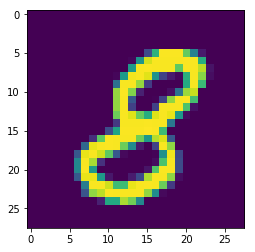

In [4]:
plt.imshow(mnist.train.images[5].reshape(28,28))

In [5]:
def Generator(z, reuse=None):
    with tf.variable_scope('gen', reuse=reuse):
        hidden1 = tf.layers.dense(inputs = z,units = 128)
        alpha = 0.01
        hidden1 = tf.maximum(hidden1*alpha, hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.maximum(hidden2*alpha, hidden2)
        output = tf.layers.dense(inputs=hidden2, units=784, activation=tf.nn.tanh)
        
        return output

In [6]:
def Discriminator(X, reuse = None):
    with tf.variable_scope('dir', reuse=reuse):
        hidden1 = tf.layers.dense(inputs = X,units = 128)
        alpha = 0.01
        hidden1 = tf.maximum(hidden1*alpha, hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.maximum(hidden2*alpha, hidden2)
        logits = tf.layers.dense(inputs=hidden2, units=1)
        output = tf.nn.sigmoid(logits)
        
        return output, logits

In [7]:
real_image = tf.placeholder(tf.float32, [None, 784])
z = tf.placeholder(tf.float32, [None, 100])

In [8]:
G = Generator(z)

In [9]:
D_output_real, D_logits_real = Discriminator(real_image)
D_output_fake, D_logits_fake = Discriminator(G, reuse=True)

In [10]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [11]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)

In [12]:
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_fake))

In [13]:
D_loss = D_real_loss + D_fake_loss

In [14]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [15]:
learning_rate = 0.001

In [16]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dir' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [17]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

In [18]:
batch_size = 100
epochs = 500
init = tf.global_variables_initializer()

In [19]:
samples = []

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epoches):
        num_batches = mnist.train.num_examples // batch_size
        for i in range(num_batches):
            
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2 - 1
            
            batch_z = np.random.uniform(-1,1, size=(batch_size, 100))
            
            _ = sess.run(D_trainer, feed_dict = {real_image:batch_images, z:batch_z})
            _ = sess.run(G_trainer, feed_dict = {z: batch_z})
            
        sample_z = np.random.uniform(-1,1, (1,100))
        gen_sample = sess.run(Generator(z, reuse = True), feed_dict = {z:sample_z})
        samples.append(sample_z)

In [20]:
saver = tf.train.Saver(var_list=g_vars)
new_samples = []
with tf.Session() as sess:
    
    saver.restore(sess,'./models/500_epoch_model.ckpt')
    
    for x in range(50):
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(Generator(z,reuse=True),feed_dict={z:sample_z})
        
        new_samples.append(gen_sample)

INFO:tensorflow:Restoring parameters from ./models/500_epoch_model.ckpt


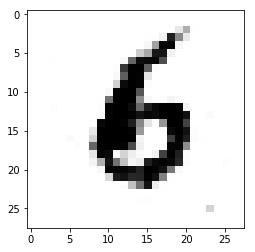

In [28]:
for i in range(50):
    plt.imshow(new_samples[49].reshape(28,28),cmap='Greys')